### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [14]:
coffee_red[coffee_red['drinks_coffee'] == True].count()/coffee_red.count()
coffee_red['drinks_coffee'].mean(), 1-coffee_red['drinks_coffee'].mean()

(0.59499999999999997, 0.40500000000000003)

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [5]:
print(coffee_red[coffee_red['drinks_coffee'] == True].height.mean())
print(coffee_red[coffee_red['drinks_coffee'] == False].height.mean())

68.1196299086
66.7849227993


`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [7]:
bootsample = coffee_full.sample(200, replace = True)

In [8]:
bootsample['drinks_coffee'].mean()

0.58499999999999996

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [10]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)

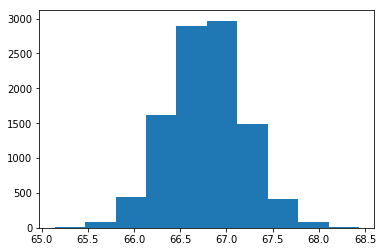

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(boot_means);

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [15]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.993989504356307, 67.577376181274516)

In [13]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()

66.443407762147004

In [24]:
bootsample[bootsample['drinks_coffee'] == False]['height'].mean()

66.184804822250598